In [1389]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1390]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 9,5

Założenia:
- ilość pokoi poniżej 5
- ilość metrów poniżej 80
- dzielnice: Czuby, Felin, Wrotków, Węglinek, Czechów
- cena poniżej 850 tys.

In [1391]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'],
                 na_values=['Zapytajocenę', 'EMPTY'])

In [1392]:
df.head(1)

,meters,price,rooms,dealer,district
0,94.24,551304.0,4.0,NaN,Czuby


In [1393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 5 columns):
meters      2801 non-null float64
price       2643 non-null float64
rooms       2800 non-null float64
dealer      2752 non-null object
district    2801 non-null object
dtypes: float64(3), object(2)
memory usage: 109.5+ KB


In [1394]:
df = df[df['district'].isin(['Czuby', 'Felin', 'Wrotków', 'Węglinek', 'Czechów'])]

In [1395]:
df = df[df['meters'] < 80][df['rooms'] < 5]

In [1396]:
df.describe(include = 'all')

,meters,price,rooms,dealer,district
count,1182.000000,1028.000000,1182.000000,1163,1182
unique,NaN,NaN,NaN,59,5
top,NaN,NaN,NaN,3KLUCZEs.c.,Wrotków
freq,NaN,NaN,NaN,205,323
mean,53.297783,322055.483512,2.566836,NaN,NaN
std,12.467586,69506.013135,0.807574,NaN,NaN
min,26.940000,162987.000000,1.000000,NaN,NaN
25%,45.580000,269000.000000,2.000000,NaN,NaN
50%,52.240000,327159.500000,3.000000,NaN,NaN
75%,63.000000,375333.000000,3.000000,NaN,NaN


In [1397]:
df.shape

(1182, 5)

In [1398]:
df.isnull().sum()

meters        0
price       154
rooms         0
dealer       19
district      0
dtype: int64

### PRICE M2





In [1399]:
df["price_m2"] = round(df["price"] / df["meters"])
df = df.drop('price', axis=1)

In [1400]:
"najniższa cena", df.price_m2.min()

('najniższa cena', 3792.0)

In [1401]:
"najwyższa cena", df.price_m2.max()

('najwyższa cena', 8380.0)

In [1402]:
df['price_m2'].groupby([df['dealer'], df['district'], df['rooms']]).mean()

dealer               district  rooms
3KLUCZEs.c.          Czuby     3.0      5712.000000
                     Felin     2.0      5392.500000
                               3.0      5243.333333
                               4.0      5150.000000
                     Węglinek  1.0      6290.909091
                                           ...     
geoDOMNieruchomości  Felin     3.0      4735.000000
                     Wrotków   4.0      4505.000000
ŻagielDomSp.zo.o.    Wrotków   2.0      5861.538462
                               3.0      5697.727273
                               4.0      5700.000000
Name: price_m2, Length: 264, dtype: float64

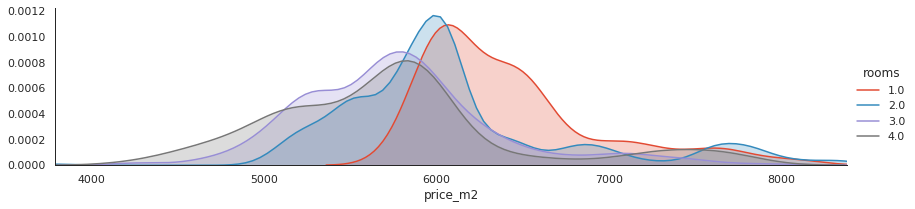

In [1428]:
facet = sns.FacetGrid(df, hue="rooms",aspect=4)
facet.map(sns.kdeplot,'price_m2',shade= True)
facet.set(xlim=(0, df['price_m2'].max()))
facet.add_legend()
plt.xlim(df.price_m2.min(), df.price_m2.max())
facet.savefig("diagrams/rooms_price_m2.png")

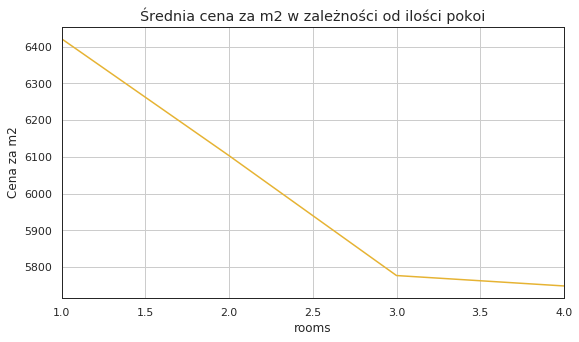

In [1404]:
fig = plt.figure(1)
plt.title("Średnia cena za m2 w zależności od ilości pokoi")
plt.grid()
plt.ylabel("Cena za m2")
df["price_m2"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
plt.grid(True)
fig.savefig('diagrams/avg_price_m2_rooms.pdf')

### DEALER

In [1405]:
df.dealer.fillna("Ofertaprywatna", inplace=True)

### Agenci nieruchomości z minimum 10 ofertami

In [1406]:
df["dealer"].value_counts()[0:20]

3KLUCZEs.c.                               205
4tepiętro                                 103
FRANCZEWSKANieruchomościs.c.              100
LUKsp.zo.o.SKA                             93
LUKJacekWysokiński                         62
ŻagielDomSp.zo.o.                          56
Ofertaprywatna                             54
Arena                                      48
NieruchomościLalakPropertiesSpzo.o.SKA     46
CLIVUSNieruchomości                        36
HomeBrokerS.A.                             33
HERMESHOUSE                                31
BiuroNieruchomościKWADRAT                  28
Lokum                                      23
LubelskieMieszkania                        21
Alfahouse                                  20
BIGCITYBROKER                              18
BESTHOUSENieruchomości                     17
InvestorNieruchomościFranchise             16
WMNieruchomości                            15
Name: dealer, dtype: int64

In [1407]:
top_dealers_list = df['dealer'].value_counts()[0:31].index.tolist()

### Ilość ofert dla wszystkich agencji z podziałem na dzielnice, oraz ilość pokoi

In [1408]:
df['district'].groupby([df['dealer'], df['district'], df['rooms']]).count()

dealer               district  rooms
3KLUCZEs.c.          Czuby     3.0       1
                     Felin     2.0      20
                               3.0      15
                               4.0       6
                     Węglinek  1.0      22
                                        ..
geoDOMNieruchomości  Felin     3.0       1
                     Wrotków   4.0       1
ŻagielDomSp.zo.o.    Wrotków   2.0      26
                               3.0      22
                               4.0       8
Name: district, Length: 265, dtype: int64

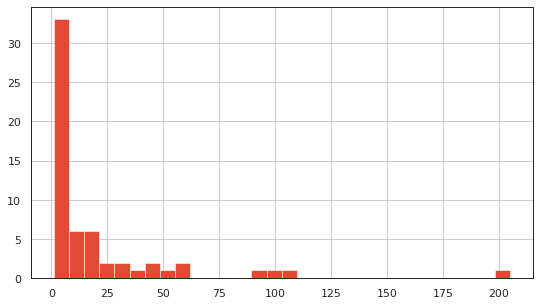

In [1409]:
df["dealer"].value_counts().hist(bins=30)

In [1410]:
df["dealer_cat"] = df["dealer"]

In [1411]:
df['dealer_cat'] = df['dealer']

In [1412]:
# for data in [df]:
#     data.loc[ df['dealer_cat'].value_counts().values <= 5, 'dealer_cat'] = 0,
#     data.loc[(df['dealer_cat'].value_counts().values > 5) & (df['dealer_cat'].value_counts().index <= 10), 'dealer_cat'] = 1,
#     data.loc[(df['dealer_cat'].value_counts().values > 10) & (df['dealer_cat'].value_counts().index <= 20), 'dealer_cat'] = 2,
#     data.loc[(df['dealer_cat'].value_counts().values > 20) & (df['dealer_cat'].value_counts().index <= 30), 'dealer_cat'] = 3,
#     data.loc[(df['dealer_cat'].value_counts().values > 30) & (df['dealer_cat'].value_counts().index <= 50), 'dealer_cat'] = 4,
#     data.loc[(df['dealer_cat'].value_counts().values > 50) & (df['dealer_cat'].value_counts().index <= 80), 'dealer_cat'] = 5,
#     data.loc[(df['dealer_cat'].value_counts().values > 80) & (df['dealer_cat'].value_counts().index <= 140), 'dealer_cat'] = 6,
#     data.loc[ df['dealer_cat'].value_counts().values > 140, 'dealer_cat'] = 7

In [1413]:
from sklearn.preprocessing import OneHotEncoder

In [1414]:
district_cat = df['dealer']

In [1415]:
district_cat_encoded, district_categories = district_cat.factorize()
district_cat_encoded[:10]

array([0, 0, 1, 2, 3, 3, 3, 3, 3, 3])

In [1416]:
encoder = OneHotEncoder(categories='auto')
district_cat_1hot = encoder.fit_transform(district_cat_encoded.reshape(-1,1))
district_cat_1hot

<1182x59 sparse matrix of type '<class 'numpy.float64'>'
	with 1182 stored elements in Compressed Sparse Row format>

### ROOMS

In [1417]:
df.rooms.value_counts()

3.0    499
2.0    443
4.0    137
1.0    103
Name: rooms, dtype: int64

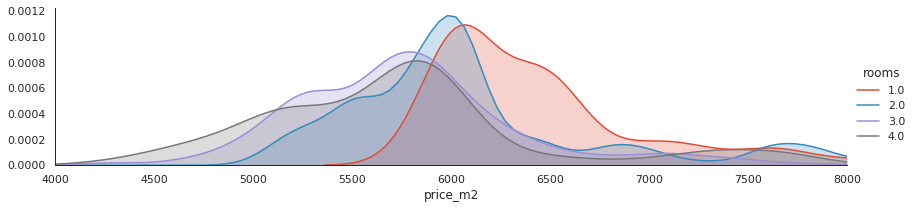

In [1427]:
facet = sns.FacetGrid(df, hue="rooms",aspect=4)
facet.map(sns.kdeplot,'price_m2',shade= True)
facet.set(xlim=(0, df['price_m2'].max()))
facet.add_legend()
plt.xlim(4000, 8000)
facet.savefig("diagrams/rooms_price_m2.png")

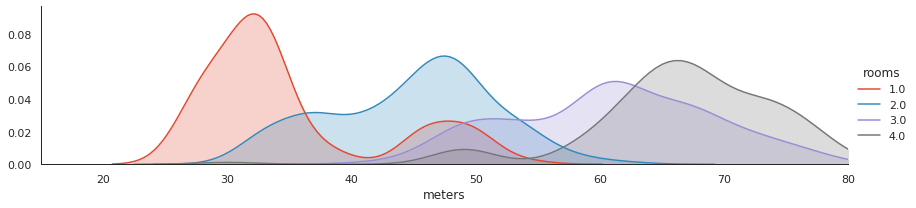

In [1426]:
facet = sns.FacetGrid(df, hue="rooms",aspect=4)
facet.map(sns.kdeplot,'meters',shade= True)
facet.set(xlim=(0, df['meters'].max()))
facet.add_legend()
plt.xlim(15, 80)
facet.savefig("diagrams/rooms_meters.png")

### DISTRICT

In [1420]:
df["district"].value_counts()

Wrotków     323
Węglinek    290
Czuby       278
Felin       146
Czechów     145
Name: district, dtype: int64

In [1421]:
df["district_cat"] = df["district"]

In [1422]:
title_mapping = {"Wrotków": 0, "Węglinek": 1, "Czuby": 2, "Felin": 4, "Czechów": 5}
for data in [df]:
    data['district_cat'] = data['district_cat'].map(title_mapping)

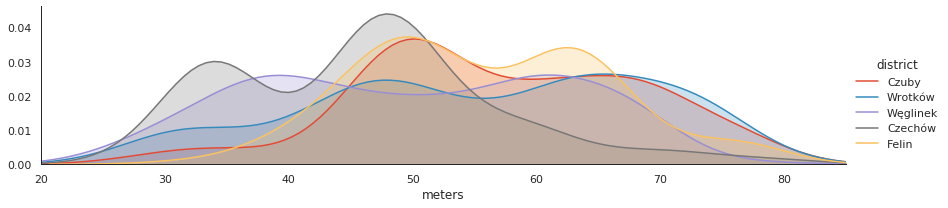

In [1423]:
facet = sns.FacetGrid(df, hue="district",aspect=4)
facet.map(sns.kdeplot,'meters',shade= True)
facet.set(xlim=(0, df['meters'].max()))
facet.add_legend()
plt.xlim(20, 85)
facet.savefig("diagrams/district_meters.png")

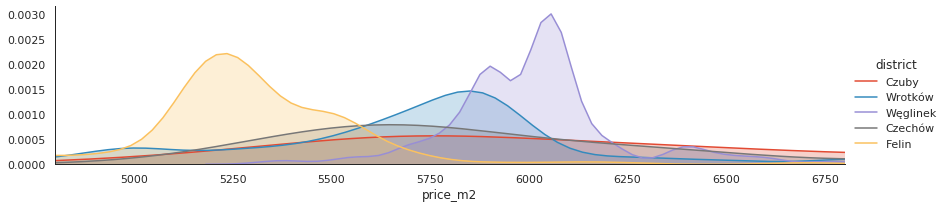

In [1425]:
facet = sns.FacetGrid(df, hue="district",aspect=4)
facet.map(sns.kdeplot,'price_m2',shade= True)
facet.set(xlim=(0, df['price_m2'].max()))
facet.add_legend()
plt.xlim(4800, 6800)
facet.savefig("diagrams/district_price_m2.png")

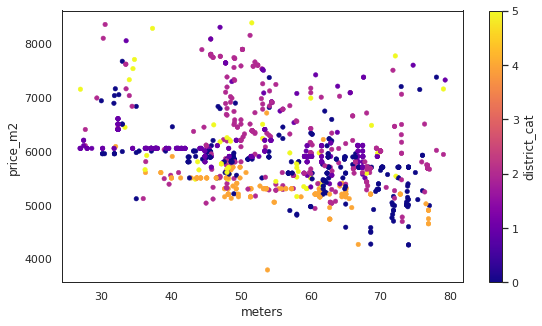

In [1375]:
df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="district_cat", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)
from pandas.plotting import scatter_matrix

### METERS

In [1376]:
df["meters_cat"] = df["meters"]

In [1377]:
df["meters_cat"].astype(int)

1       59
2       53
6       63
7       40
9       67
        ..
2791    66
2794    67
2796    56
2798    68
2800    73
Name: meters_cat, Length: 1182, dtype: int64

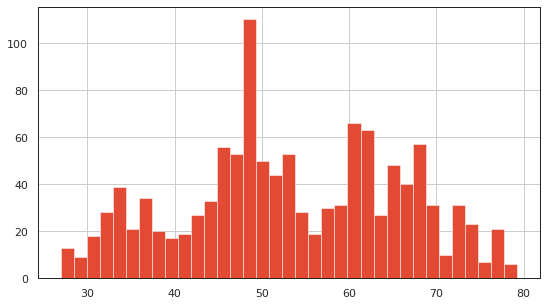

In [1378]:
df["meters_cat"].hist(bins=35)

In [1379]:
for data in [df]:
    data.loc[ data['meters_cat'] <= 30, 'meters_cat'] = 0,
    data.loc[(data['meters_cat'] > 30) & (data['meters_cat'] <= 40), 'meters_cat'] = 1,
    data.loc[(data['meters_cat'] > 40) & (data['meters_cat'] <= 50), 'meters_cat'] = 2,
    data.loc[(data['meters_cat'] > 50) & (data['meters_cat'] <= 60), 'meters_cat'] = 3,
    data.loc[(data['meters_cat'] > 60) & (data['meters_cat'] <= 70), 'meters_cat'] = 4,
    data.loc[ data['meters_cat'] > 70, 'meters_cat'] = 5

In [1380]:
df.meters_cat.value_counts()

2.0    338
4.0    295
3.0    252
1.0    171
5.0    103
0.0     23
Name: meters_cat, dtype: int64

In [1381]:
df = df.drop('meters', axis=1)
del (df['dealer'], df['district'])

## KORELACJA

In [1382]:
corr_df = df.corr()
corr_df["price_m2"].sort_values(ascending=False)

price_m2        1.000000
district_cat   -0.108895
rooms          -0.271713
meters_cat     -0.322441
Name: price_m2, dtype: float64

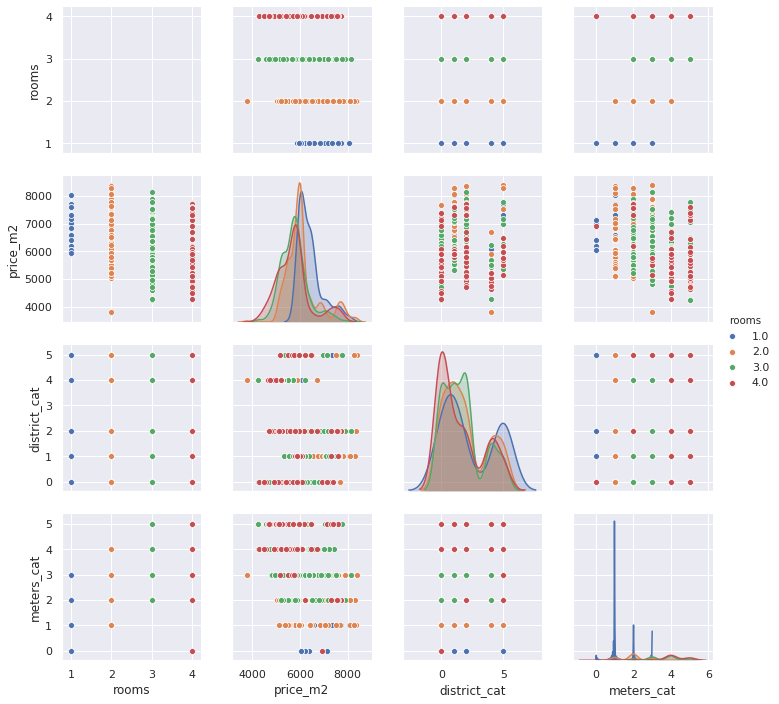

In [1387]:
sns.set()
sns_plot = sns.pairplot(df, hue='rooms', size=2.5)
sns_plot.savefig("diagrams/correlation.png")
#sns.pairplot(df,diag_kind="kde")